In [1]:
import os
import pandas as pd
import shutil

In [2]:
csv_file = pd.read_csv("C:/Users/msyu7/Desktop/detection/code/gastroscopy_data2.csv")

In [5]:
#먼저 2048 -> 256으로 바꿔주기

csv_path = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_data2.csv'
output_csv_path = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_meta_256.csv'

scale_factor = 256 / 2048  # 0.125

df = pd.read_csv(csv_path)

df['x_min'] = df['x_min'] * scale_factor
df['y_min'] = df['y_min'] * scale_factor
df['x_max'] = df['x_max'] * scale_factor
df['y_max'] = df['y_max'] * scale_factor
# df['polygon_mask'] = df['polygon_mask'] * scale_factor
df['width'] = df['width'] * scale_factor
df['height'] = df['height'] * scale_factor

df[['x_min', 'y_min', 'x_max', 'y_max']] = df[['x_min', 'y_min', 'x_max', 'y_max']].round(6)

df.to_csv(output_csv_path, index=False)

In [ ]:
csv_file = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_meta_256.csv'
label_dir = 'C:/Users/msyu7/Desktop/detection/Dataset/labels/train'

class_mapping = {"ulcer": 0, 'polyp':1, "cancer":2}

df = pd.read_csv(csv_file)

In [ ]:
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv("C:/Users/msyu7/Desktop/detection/256_gastroscopy/train_meta.csv")

df['label'] = df['image_id'].apply(lambda x: int(x.split('_')[1]))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(df, df['label']):
    train_df = df.iloc[train_index]
    val_df = df.iloc[val_index]
    
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)

In [ ]:
csv_file = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_meta_256.csv'
label_dir = 'C:/Users/msyu7/Desktop/detection/Dataset/labels/train'

class_mapping = {"ulcer": 0, 'polyp':1, "cancer":2}

df = pd.read_csv(csv_file)

for index, row in df.iterrows():
    image_name = row['image_id']
    class_name = row['lesion']
    class_id = class_mapping[class_name]

    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    img_width, img_height = row['width'], row['height']

    x_center = ((x_min + x_max) / 2) / img_width
    y_center = ((y_min + y_max) / 2) / img_height
    bbox_width = (x_max - x_min) / img_width
    bbox_height = (y_max - y_min) / img_height

    label_path = os.path.join(label_dir, image_name.replace('.png', '.txt'))

    with open(label_path, 'a') as label_file:
        label_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}/n")

In [10]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ultralytics in c:\users\msyu7\appdata\local\programs\python\python312\lib\site-packages (8.3.65)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO

In [25]:
import torch
print(torch.__version__)

2.4.1+cu124


In [1]:
model = YOLO("yolo11n.pt")

results = model.train(
    data="C:/Users/msyu7/Desktop/detection/Dataset/data.yaml",
    project="C:/Users/msyu7/Desktop/detection/experiments",
    name="exp2",
    epochs=50,
    imgsz=256,
    augment=True,  #증강 활성화
    degrees=15,  # 회전 
    translate=0.1,  # 이동
    scale=0.5,  # 확대/축소
    shear=5.0,  # 왜곡
    flipud=0.5,  # 상하 반전
    fliplr=0.5,  # 좌우 반전
    hsv_h=0.015,  # 색조 
    hsv_s=0.7,  # 채도 
    hsv_v=0.4,  # 명도 
    patience=10
)

100%|██████████| 5.35M/5.35M [00:01<00:00, 3.94MB/s]


Ultralytics 8.3.68  Python-3.12.5 torch-2.4.1+cu124 CPU (13th Gen Intel Core(TM) i7-1360P)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:/Users/msyu7/Desktop/detection/Dataset/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:/Users/msyu7/Desktop/detection/experiments, name=exp2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

train: Scanning C:\Users\msyu7\Desktop\detection\Dataset\labels\train.cache... 1280 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1280/1280 [00:00<?, ?it/s]

train: WARNING  C:\Users\msyu7\Desktop\detection\Dataset\images\train\1_1_00024.png: 2 duplicate labels removed
train: WARNING  C:\Users\msyu7\Desktop\detection\Dataset\images\train\1_1_00027.png: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\msyu7\Desktop\detection\Dataset\labels\val.cache... 320 images, 0 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<?, ?it/s]


Plotting labels to C:\Users\msyu7\Desktop\detection\experiments\exp2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to C:\Users\msyu7\Desktop\detection\experiments\exp2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.613      3.025      1.587         36        256: 100%|██████████| 80/80 [02:24<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:14<00:00,  1.45s/it]

                   all        320        450      0.458      0.208      0.211     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.696      2.347      1.628         43        256: 100%|██████████| 80/80 [02:39<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:15<00:00,  1.52s/it]

                   all        320        450      0.292      0.342      0.234     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.649      2.213        1.6         40        256: 100%|██████████| 80/80 [02:45<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:15<00:00,  1.58s/it]

                   all        320        450       0.26      0.293      0.171     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.645      2.147       1.58         37        256: 100%|██████████| 80/80 [02:47<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:15<00:00,  1.54s/it]


                   all        320        450      0.247      0.378       0.26      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.626      2.072      1.552         46        256: 100%|██████████| 80/80 [02:44<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]

                   all        320        450      0.405      0.391      0.331      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.575      1.997      1.526         51        256: 100%|██████████| 80/80 [02:07<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.22s/it]

                   all        320        450      0.431      0.392       0.34      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.551      1.985      1.521         35        256: 100%|██████████| 80/80 [02:09<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.23s/it]

                   all        320        450      0.542      0.448      0.436      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.534      1.915       1.51         44        256: 100%|██████████| 80/80 [02:10<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.23s/it]

                   all        320        450      0.521       0.41      0.353      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G       1.48      1.857      1.475         48        256: 100%|██████████| 80/80 [02:09<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.21s/it]

                   all        320        450      0.447      0.384      0.354      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.492      1.859      1.477         36        256: 100%|██████████| 80/80 [02:08<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.28s/it]

                   all        320        450      0.446      0.478      0.416      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.487      1.842      1.467         47        256: 100%|██████████| 80/80 [02:06<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]

                   all        320        450      0.535       0.49      0.468      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.477      1.793      1.449         50        256: 100%|██████████| 80/80 [02:10<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.20s/it]

                   all        320        450       0.54      0.502       0.49      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.424      1.746      1.427         37        256: 100%|██████████| 80/80 [02:08<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.28s/it]

                   all        320        450      0.557      0.487      0.475      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.422      1.713      1.417         54        256: 100%|██████████| 80/80 [02:07<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.20s/it]

                   all        320        450      0.548      0.544      0.528      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.416      1.743      1.418         78        256: 100%|██████████| 80/80 [02:09<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.18s/it]

                   all        320        450      0.558      0.506      0.515      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.403      1.695      1.407         41        256: 100%|██████████| 80/80 [02:13<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.28s/it]

                   all        320        450      0.572      0.498      0.495      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.381      1.713      1.406         50        256: 100%|██████████| 80/80 [02:11<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.25s/it]

                   all        320        450      0.512      0.525      0.507      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.367      1.651      1.404         37        256: 100%|██████████| 80/80 [02:13<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.19s/it]

                   all        320        450      0.624      0.524       0.55      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.366      1.624      1.402         42        256: 100%|██████████| 80/80 [02:09<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.25s/it]

                   all        320        450      0.647      0.443      0.518      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.359      1.622        1.4         55        256: 100%|██████████| 80/80 [02:11<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.30s/it]

                   all        320        450      0.602      0.523      0.533      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.385      1.644      1.392         50        256: 100%|██████████| 80/80 [02:20<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.18s/it]

                   all        320        450      0.587      0.548      0.545      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.365      1.644      1.404         61        256: 100%|██████████| 80/80 [02:13<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]

                   all        320        450      0.604       0.55      0.562      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G       1.34      1.618      1.385         45        256: 100%|██████████| 80/80 [02:07<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

                   all        320        450      0.633      0.579      0.586      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.343       1.59      1.374         70        256: 100%|██████████| 80/80 [02:25<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

                   all        320        450      0.629      0.538      0.553      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.343      1.597      1.377         33        256: 100%|██████████| 80/80 [01:19<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        320        450      0.652      0.527      0.563      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.324      1.588      1.367         47        256: 100%|██████████| 80/80 [00:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]

                   all        320        450      0.603      0.537      0.564      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.293      1.545      1.357         58        256: 100%|██████████| 80/80 [01:04<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]

                   all        320        450      0.593      0.598      0.594       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.313      1.535      1.359         34        256: 100%|██████████| 80/80 [01:50<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:15<00:00,  1.54s/it]

                   all        320        450      0.666      0.532      0.583        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.299      1.552      1.362         57        256: 100%|██████████| 80/80 [02:39<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

                   all        320        450      0.639      0.517      0.557      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.288      1.514      1.355         38        256: 100%|██████████| 80/80 [03:38<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.67s/it]

                   all        320        450      0.742      0.521       0.62      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.291      1.529      1.347         43        256: 100%|██████████| 80/80 [04:16<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:17<00:00,  1.70s/it]

                   all        320        450      0.641      0.575      0.603      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.299      1.494       1.36         49        256: 100%|██████████| 80/80 [03:12<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        320        450      0.672      0.557      0.597       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.269      1.488      1.332         38        256: 100%|██████████| 80/80 [01:59<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        320        450      0.666      0.593      0.611      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.268      1.519      1.339         58        256: 100%|██████████| 80/80 [03:02<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        320        450      0.655      0.604      0.614      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.245      1.454      1.322         37        256: 100%|██████████| 80/80 [03:40<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:15<00:00,  1.55s/it]

                   all        320        450      0.634      0.584      0.596      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.249      1.445      1.321         44        256: 100%|██████████| 80/80 [04:04<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:17<00:00,  1.71s/it]

                   all        320        450       0.62      0.583      0.606       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.243      1.453      1.325         55        256: 100%|██████████| 80/80 [03:59<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.20s/it]

                   all        320        450       0.64      0.581      0.593      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.249       1.44      1.332         37        256: 100%|██████████| 80/80 [00:48<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

                   all        320        450      0.663      0.622      0.622      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.252      1.453      1.332         43        256: 100%|██████████| 80/80 [00:49<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        320        450      0.696      0.582      0.631      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.244      1.422       1.33         53        256: 100%|██████████| 80/80 [00:49<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        320        450      0.648      0.627      0.616      0.324


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.229      1.427      1.315         23        256: 100%|██████████| 80/80 [00:51<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        320        450       0.63      0.603      0.613      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.204      1.327      1.306         19        256: 100%|██████████| 80/80 [00:57<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]

                   all        320        450      0.651       0.57      0.619      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G       1.23      1.283      1.311         29        256: 100%|██████████| 80/80 [00:57<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        320        450      0.657      0.585      0.619      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.202      1.283      1.295         24        256: 100%|██████████| 80/80 [00:51<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        320        450      0.635      0.633      0.645      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G       1.19      1.249      1.288         19        256: 100%|██████████| 80/80 [00:49<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        320        450      0.696      0.581      0.639      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.188       1.24      1.285         19        256: 100%|██████████| 80/80 [00:50<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        320        450      0.727        0.6      0.646       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.169      1.203      1.281         20        256: 100%|██████████| 80/80 [00:54<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        320        450      0.731      0.581      0.652       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.185      1.221      1.292         26        256: 100%|██████████| 80/80 [00:56<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        320        450      0.665       0.62      0.646      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.165      1.176      1.281         22        256: 100%|██████████| 80/80 [00:51<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

                   all        320        450      0.687      0.616      0.651      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.153      1.175      1.287         20        256: 100%|██████████| 80/80 [00:50<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        320        450       0.69      0.616      0.653      0.354



50 epochs completed in 1.847 hours.
Optimizer stripped from C:\Users\msyu7\Desktop\detection\experiments\exp2\weights\last.pt, 5.4MB
Optimizer stripped from C:\Users\msyu7\Desktop\detection\experiments\exp2\weights\best.pt, 5.4MB

Validating C:\Users\msyu7\Desktop\detection\experiments\exp2\weights\best.pt...
Ultralytics 8.3.68  Python-3.12.5 torch-2.4.1+cu124 CPU (13th Gen Intel Core(TM) i7-1360P)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


                   all        320        450      0.675      0.624      0.663      0.364
                 ulcer         80        108      0.666      0.481      0.569       0.28
                 polyp         80        148      0.707      0.716      0.733      0.401
                cancer        160        194      0.652      0.675      0.689       0.41
Speed: 0.1ms preprocess, 27.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to C:\Users\msyu7\Desktop\detection\experiments\exp2


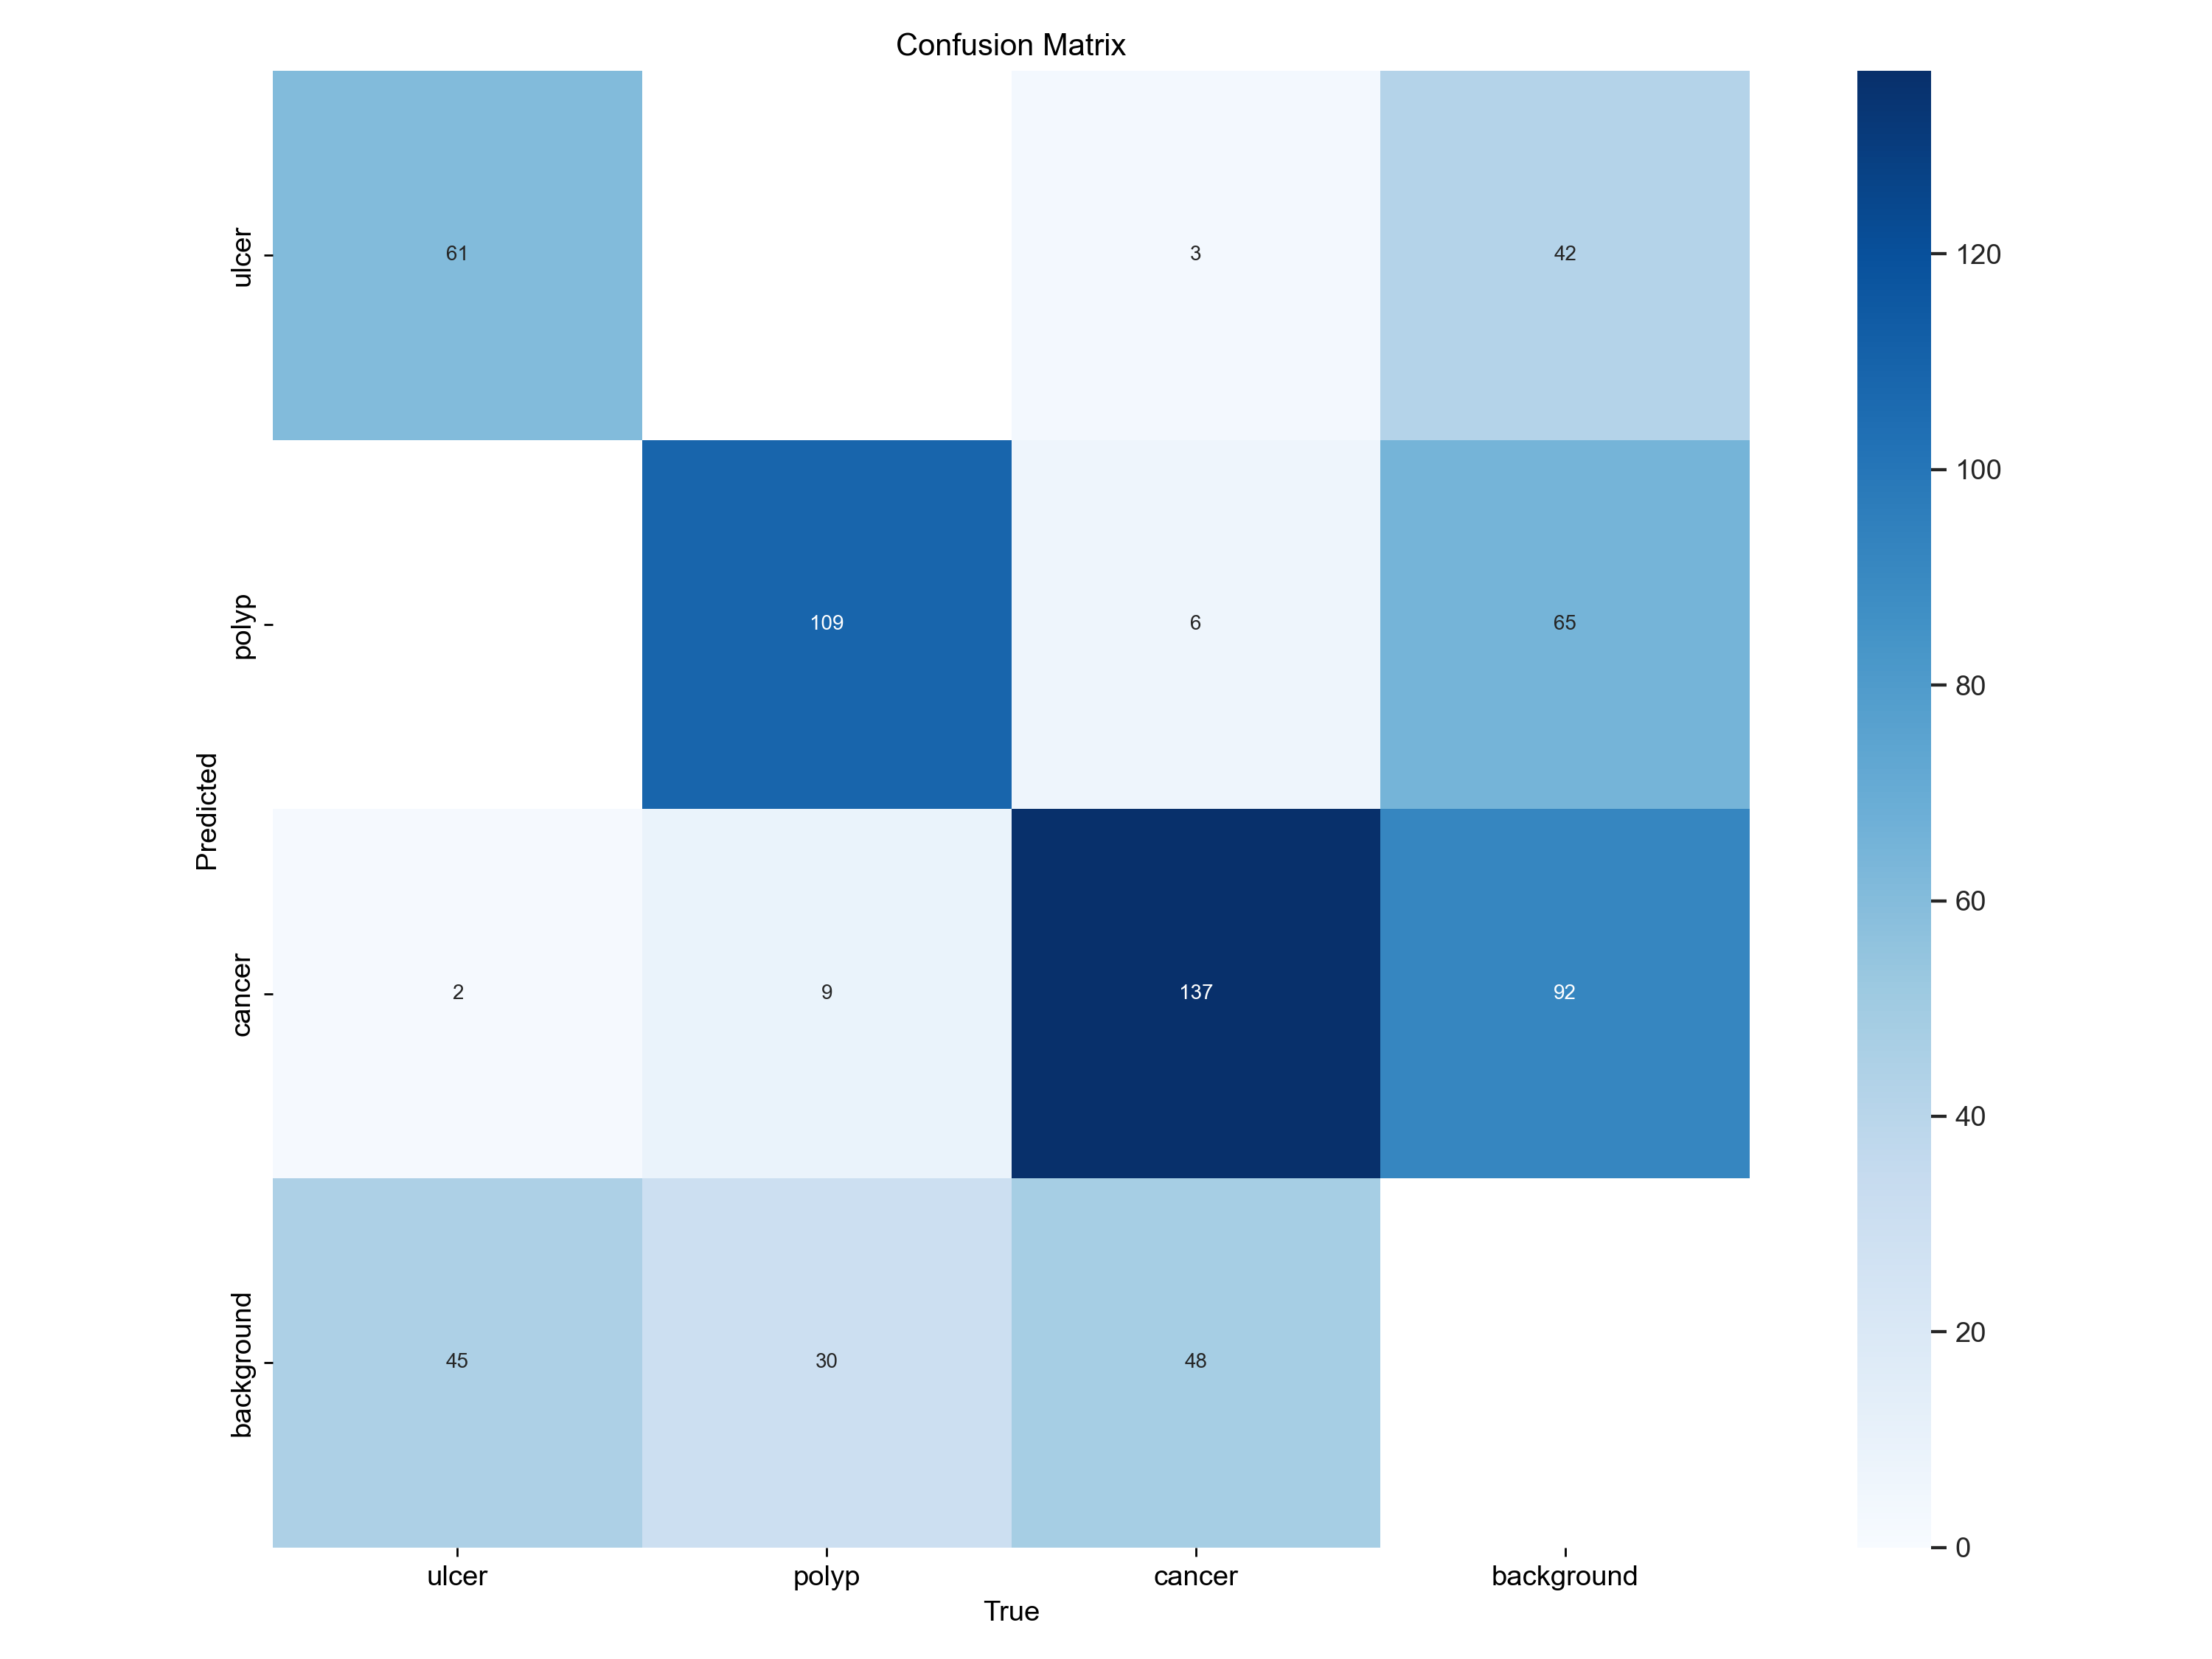

In [1]:
from PIL import Image
Image.open('C:/Users/msyu7/Desktop/detection/experiments/exp2/confusion_matrix.png')

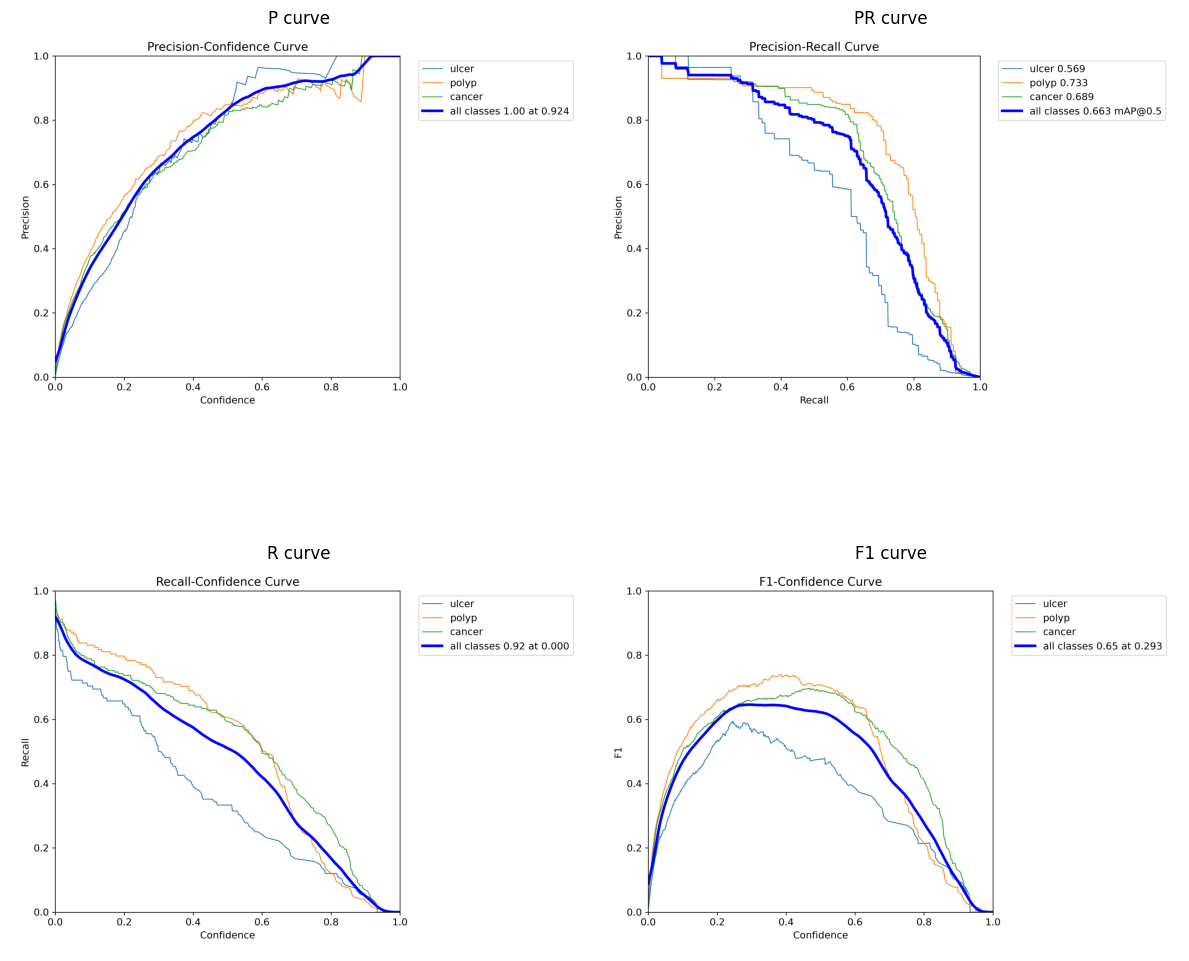

In [2]:
import matplotlib.pyplot as plt 

p_path = "C:/Users/msyu7/Desktop/detection/experiments/exp2/P_curve.png"
pr_path = "C:/Users/msyu7/Desktop/detection/experiments/exp2/PR_curve.png"
r_path = "C:/Users/msyu7/Desktop/detection/experiments/exp2/R_curve.png"
f1_path = "C:/Users/msyu7/Desktop/detection/experiments/exp2/F1_curve.png"

p_img = Image.open(p_path)
pr_img = Image.open(pr_path)
r_img = Image.open(r_path)
f1_img = Image.open(f1_path)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(p_img)
plt.title("P curve")
plt.axis("off")  

plt.subplot(2, 2, 2) 
plt.imshow(pr_img)
plt.title("PR curve")
plt.axis("off")  

plt.subplot(2, 2, 3) 
plt.imshow(r_img)
plt.title("R curve")
plt.axis("off")  

plt.subplot(2, 2, 4) 
plt.imshow(f1_img)
plt.title("F1 curve")
plt.axis("off")  

plt.tight_layout()
plt.show()


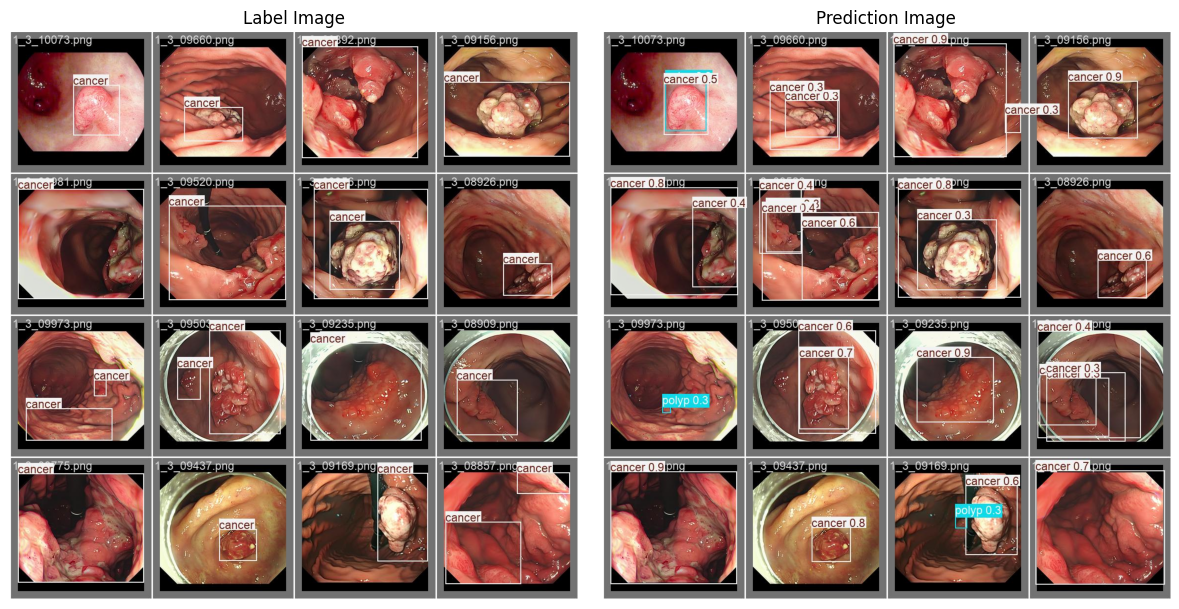

In [4]:
label_image_path = "C:/Users/msyu7/Desktop/detection/experiments/exp2/val_batch0_labels.jpg"
pred_image_path = "C:/Users/msyu7/Desktop/detection/experiments/exp2/val_batch0_pred.jpg"

label_img = Image.open(label_image_path)
pred_img = Image.open(pred_image_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(label_img)
plt.title("Label Image")
plt.axis("off")  

plt.subplot(1, 2, 2) 
plt.imshow(pred_img)
plt.title("Prediction Image")
plt.axis("off")  

plt.tight_layout()

plt.show()